In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical


In [3]:
TRAIN_DIR = r"D:\velocity\project\FACIAL_EMOTION_RECOGNITION\train"
TEST_DIR = r"D:\velocity\project\FACIAL_EMOTION_RECOGNITION\test"

In [4]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if not os.path.isdir(label_path):
            continue
        for filename in os.listdir(label_path):
            image_path = os.path.join(label_path, filename)
            image_paths.append(image_path)
            labels.append(label)
        print(label, "Completed")

    return image_paths, labels

# Convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

# Shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
print(train.head())


Angry Completed
Disgust Completed
Fear Completed
Happy Completed
Neutral Completed
Sad Completed
Surprise Completed
                                               image     label
0  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...  Surprise
1  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...  Surprise
2  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...     Happy
3  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...      Fear
4  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...  Surprise


In [5]:
# Convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)

# Shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
print(train.head())


Angry Completed
Disgust Completed
Fear Completed
Happy Completed
Neutral Completed
Sad Completed
Surprise Completed
                                               image     label
0  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...  Surprise
1  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...  Surprise
2  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...   Neutral
3  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...     Happy
4  D:\velocity\project\FACIAL_EMOTION_RECOGNITION...   Neutral


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

Angry Completed
Disgust Completed
Fear Completed
Happy Completed
Neutral Completed
Sad Completed
Surprise Completed


,image,label
0,D:\velocity\project\FACIAL_EMOTION_RECOGNITION...,Angry
1,D:\velocity\project\FACIAL_EMOTION_RECOGNITION...,Angry
2,D:\velocity\project\FACIAL_EMOTION_RECOGNITION...,Angry
3,D:\velocity\project\FACIAL_EMOTION_RECOGNITION...,Angry
4,D:\velocity\project\FACIAL_EMOTION_RECOGNITION...,Angry


<Axes: xlabel='count', ylabel='label'>

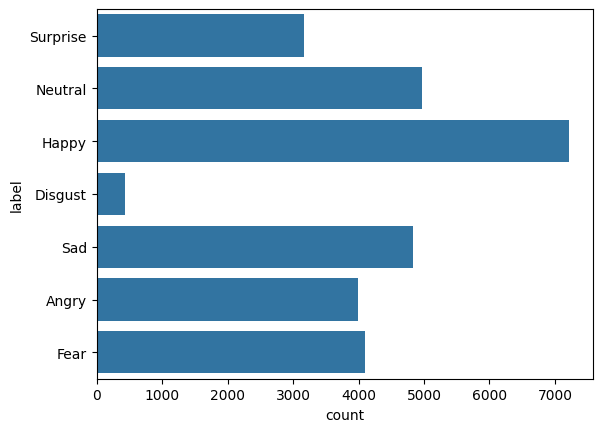

In [7]:
sns.countplot(train['label'])


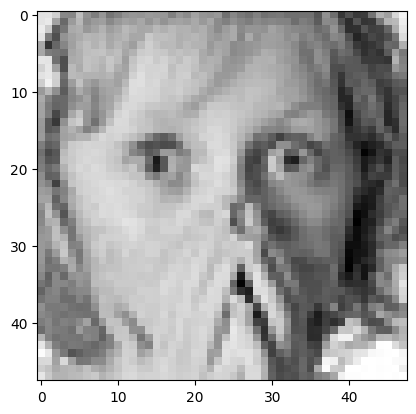

In [8]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

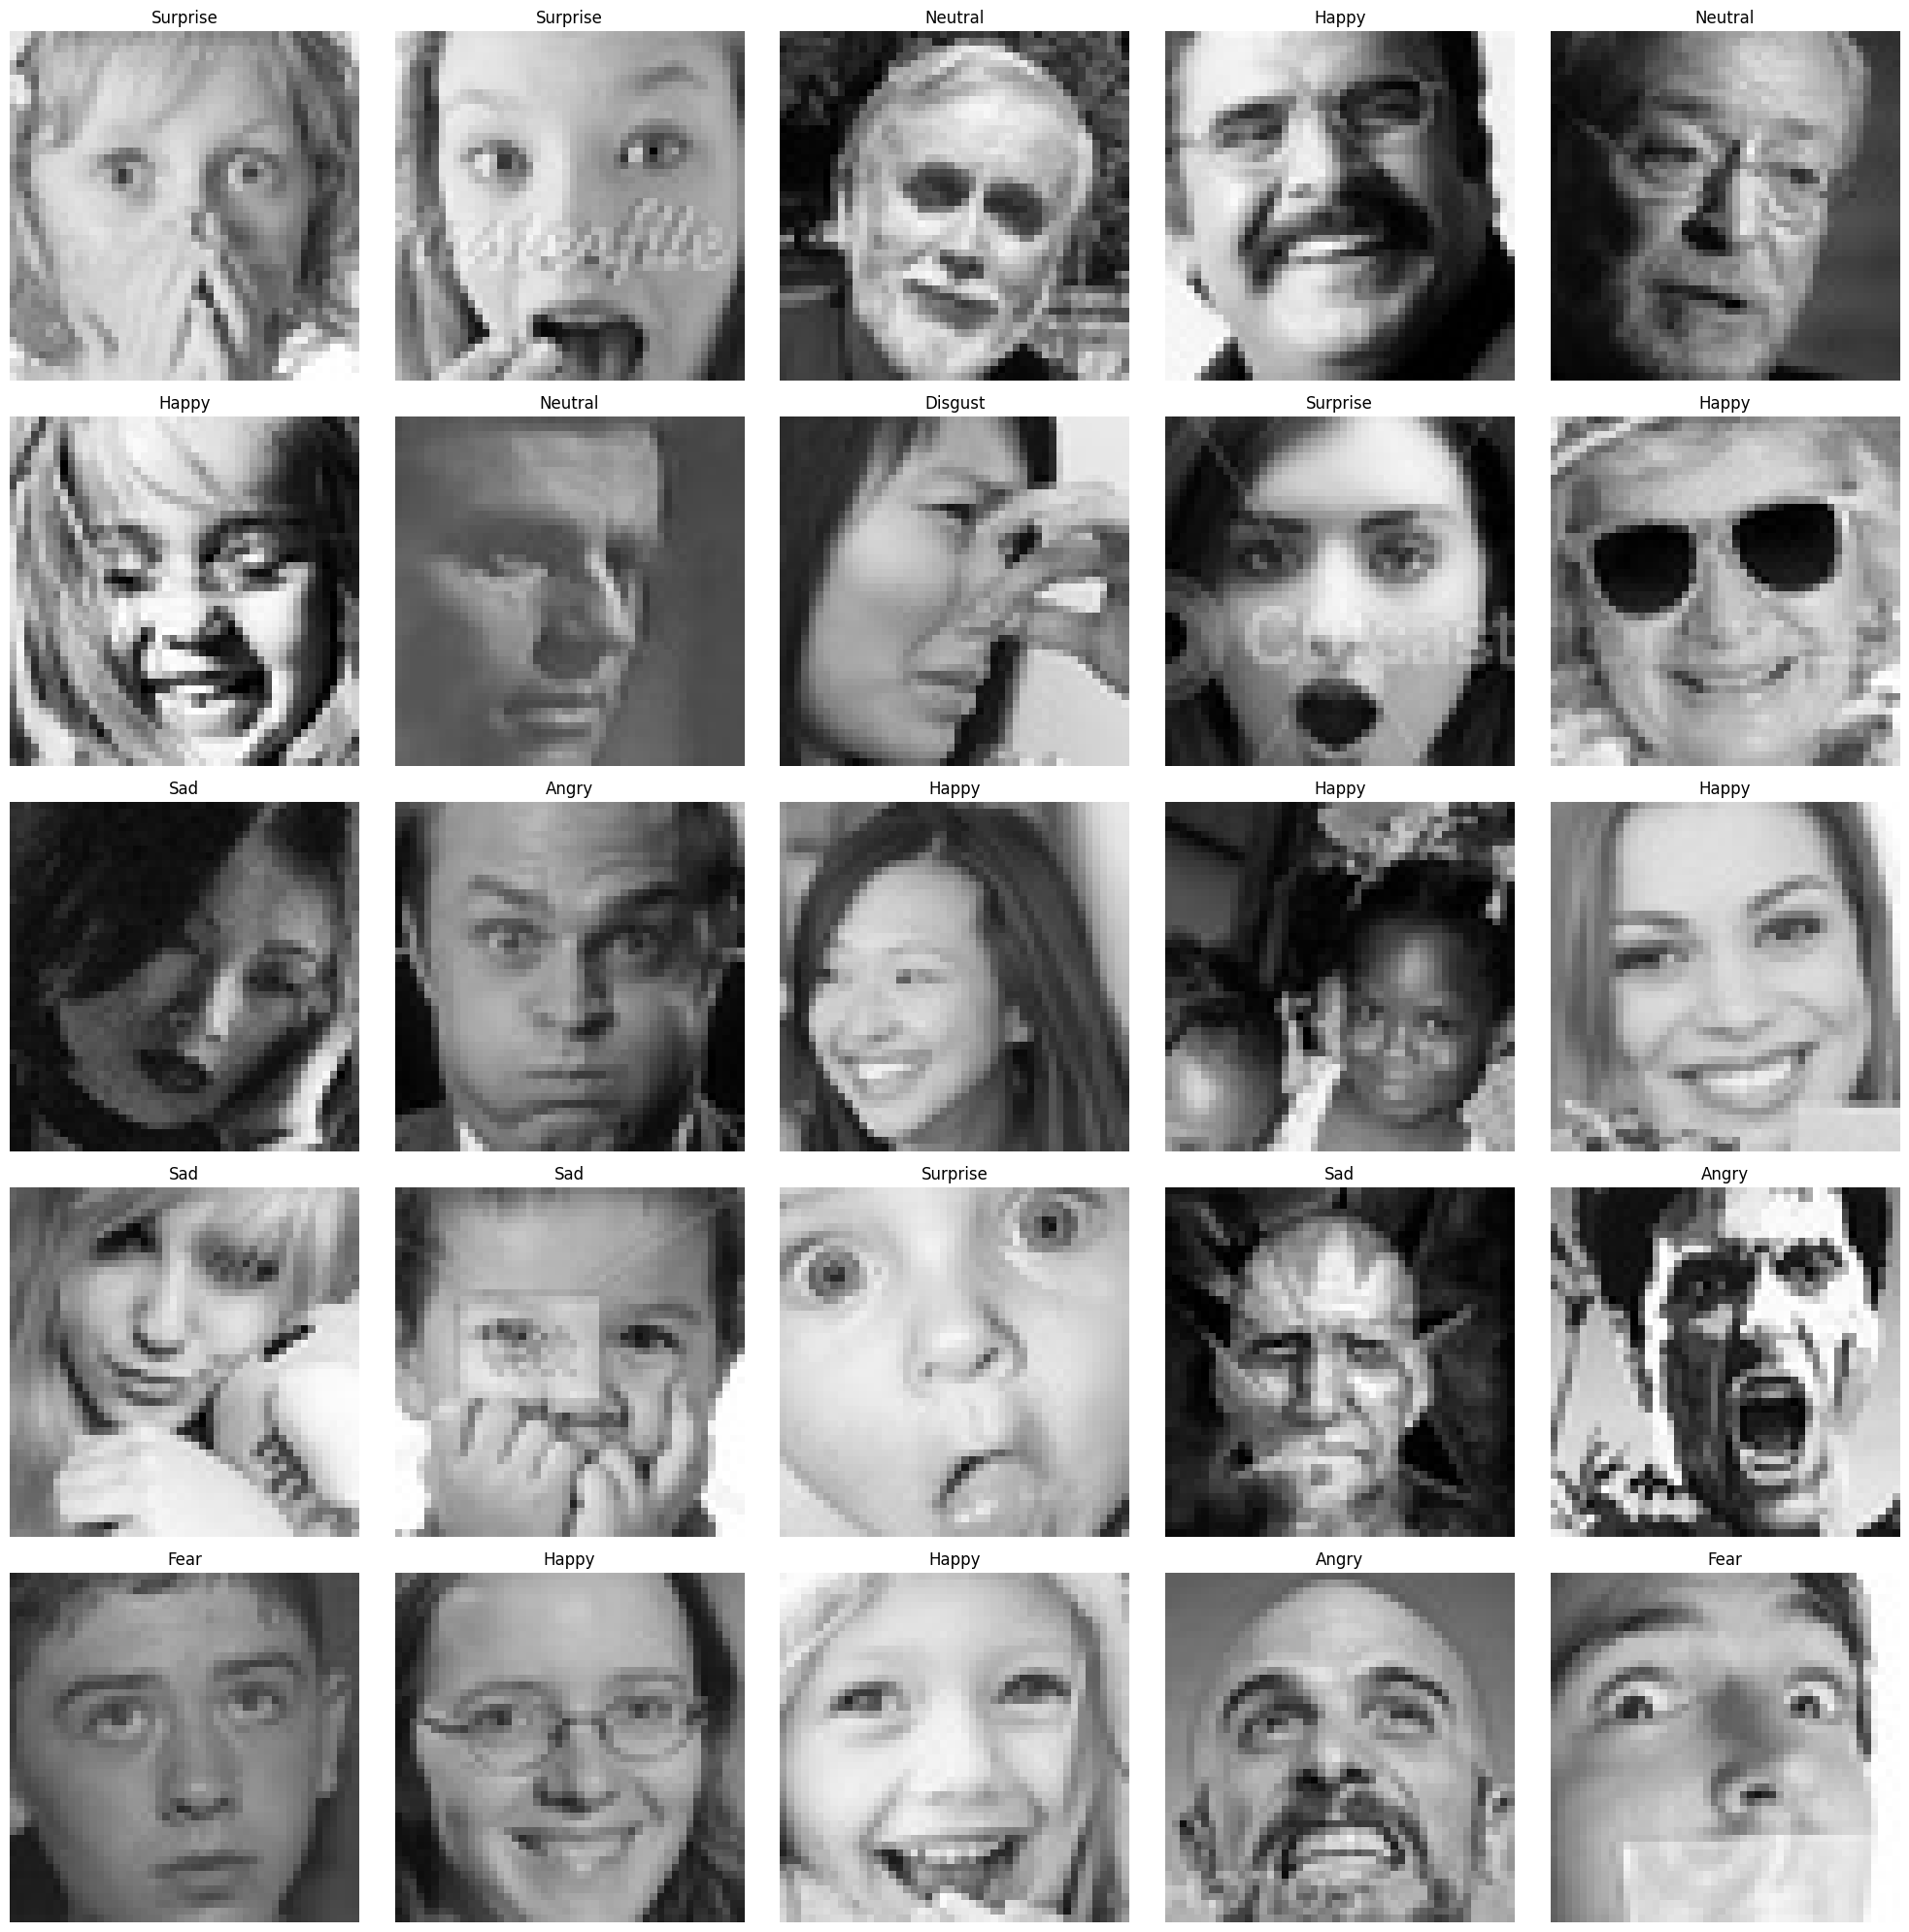

In [9]:


plt.figure(figsize=(20, 20))
files = train.iloc[0:25]

for i, row in files.iterrows():
    plt.subplot(5, 5, i + 1)
    img = load_img(row['image'])  # You can also add target_size=(48,48) if needed
    img = np.array(img)
    plt.imshow(img)
    plt.title(row['label'])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder
# Extract image features
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale', target_size=(48, 48))
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

# Normalize
x_train = train_features / 255.0
x_test = test_features / 255.0

# Encode labels (fix includes both train and test)
le = LabelEncoder()
le.fit(list(train['label']) + list(test['label']))

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

y_train = to_categorical(y_train, num_classes=len(le.classes_))
y_test = to_categorical(y_test, num_classes=len(le.classes_))

# Optional check
print(y_train[0])

# Config
input_shape = (48, 48, 1)
output_class = len(le.classes_)


  0%|          | 0/28709 [00:00<?, ?it/s]

  0%|          | 0/7184 [00:00<?, ?it/s]

[0. 0. 0. 0. 0. 0. 1.]


In [12]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu',
input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics='accuracy')
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=100,
validation_data=(x_test, y_test))


Epoch 1/100
225/225 [==============================] - 982s 4s/step - loss: 1.8218 - accuracy: 0.2478 - val_loss: 1.8204 - val_accuracy: 0.2471
Epoch 2/100
225/225 [==============================] - 870s 4s/step - loss: 1.7971 - accuracy: 0.2505 - val_loss: 1.7423 - val_accuracy: 0.2840
Epoch 3/100
225/225 [==============================] - 786s 3s/step - loss: 1.6874 - accuracy: 0.3161 - val_loss: 1.5769 - val_accuracy: 0.3742
Epoch 4/100
225/225 [==============================] - 810s 4s/step - loss: 1.5413 - accuracy: 0.3955 - val_loss: 1.4155 - val_accuracy: 0.4500
Epoch 5/100
225/225 [==============================] - 861s 4s/step - loss: 1.4585 - accuracy: 0.4354 - val_loss: 1.3448 - val_accuracy: 0.4779
Epoch 6/100
225/225 [==============================] - 823s 4s/step - loss: 1.4034 - accuracy: 0.4594 - val_loss: 1.2825 - val_accuracy: 0.5050
Epoch 7/100
225/225 [==============================] - 1064s 5s/step - loss: 1.3576 - accuracy: 0.4800 - val_loss: 1.2686 - val_accuracy

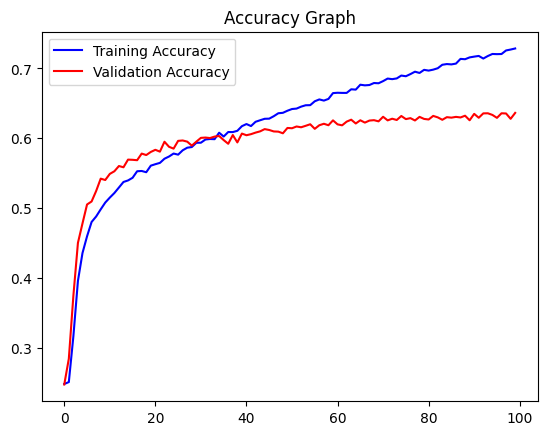

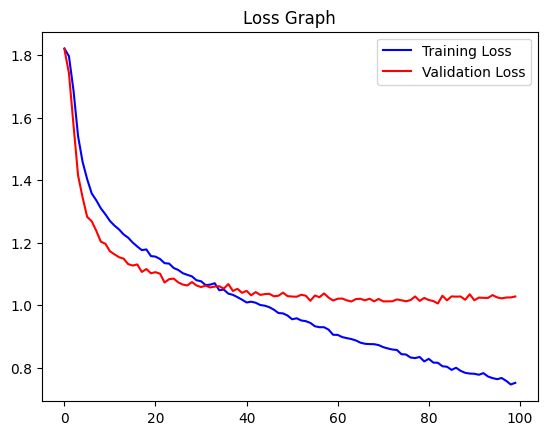

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Original Output: Happy
1/1 [==============================] - 1s 825ms/step
Predicted Output: Fear


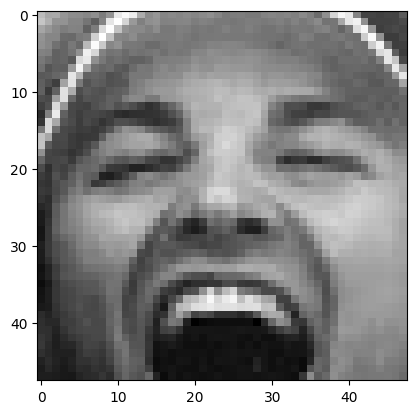

In [15]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Happy
1/1 [==============================] - 0s 39ms/step
Predicted Output: Neutral


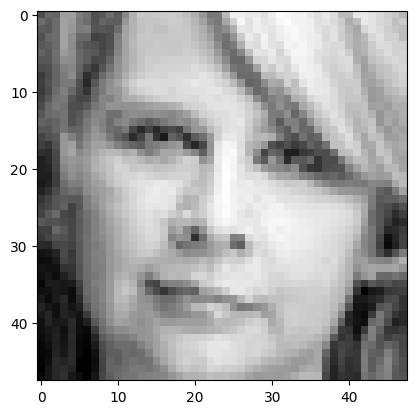

In [16]:

image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: Sad
1/1 [==============================] - 0s 36ms/step
Predicted Output: Sad


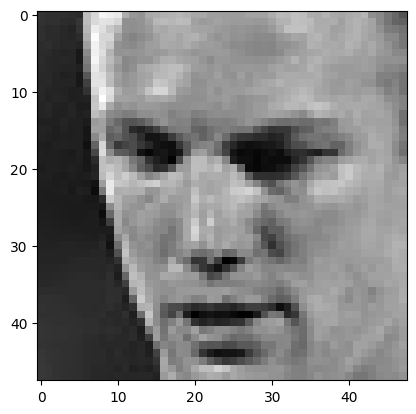

In [17]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');